In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize     # Sentences
from nltk.tokenize import word_tokenize     # Words
from nltk.probability import FreqDist       # Evaluación de frecuencia
from nltk.corpus import stopwords           # Stopwords
from nltk.stem import PorterStemmer               # Stemmer
from nltk.stem.wordnet import WordNetLemmatizer   # Lemmatization

### Tokenization

Tokenization es el primer paso en el análisis de texto. Consiste en fraccionar un párrafo en pequeños fragmentos tales como palabras o frases. Un token es una única unidad que es un bloque de construcción de la frase o párrafo

In [104]:
text = """Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""

text_2 = "Hola mundo"

In [105]:
textos = [text, text_2]

In [106]:
textos

["Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.\nThe sky is pinkish-blue. You shouldn't eat cardboard",
 'Hola mundo']

In [24]:
# Separación por frases

tokenized_text = sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [25]:
# Separación por palabras

tokenized_word = word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


### Distribución de frecuencia

In [111]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


In [27]:
# términos más frecuentes
fdist.most_common(2)

[('is', 3), (',', 2)]

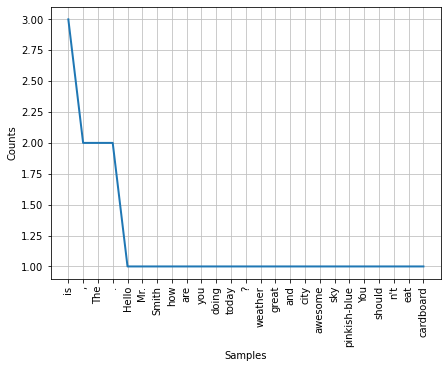

In [113]:
plt.figure(figsize=(7,5))
fdist.plot(30, cumulative=False)
plt.show()

In [49]:
# Búsqueda detallada de palabras

words = []
for w in tokenized_word:
    if len(w)>3:
        words.append(w)
    
print(words)

['Hello', 'Smith', 'doing', 'today', 'weather', 'great', 'city', 'awesome', 'pinkish-blue', 'should', 'cardboard']


### Stopwords

Las stopwords se consideran como reuido en el análisis de texto, algunos ejemplo son: is, am, this, the, etc.
In NLTK para remover palabras se debe crear una lista de "stopwords" y filtrar la lista de tokens.

In [29]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'wouldn', 'then', 'that', 'theirs', 'weren', 'is', "shouldn't", 'our', 'more', 'or', 'if', 'in', 'these', "couldn't", 'this', 'because', 'doesn', 'the', 'should', 'has', "needn't", 'yourselves', 'both', 'each', 'yourself', 'with', 'below', 'him', 'of', 'after', 'be', 'further', 'on', "mightn't", 'from', 'same', 'whom', 'her', 'nor', 'about', 'we', 'and', 'than', 'don', 'myself', 'any', 'up', 'doing', 'to', 'own', 'can', 'having', "that'll", 'here', 'o', 've', 'couldn', "wasn't", 'i', 'won', "shan't", 'before', "should've", 'they', 'his', 'off', 'will', 'only', 'mightn', "don't", 'are', 'herself', 'such', 'as', 'my', 'very', 'needn', 'out', 're', 'am', 'does', 'what', 'down', 'against', 'd', 'y', "it's", 'for', 'through', "won't", 'during', 'who', 'a', "you'd", 'himself', "hadn't", 'just', 'shan', 'had', 'there', 'some', 'most', 'so', 'over', 'your', 'no', 'once', 'you', 'while', 'mustn', 'm', "you'll", 'but', 'hasn', 'themselves', 'its', "hasn't", 'she', 'above', 'which', "you're", "m

In [109]:
tokenized_word

['Hello',
 'Mr.',
 'Smith',
 ',',
 'how',
 'are',
 'you',
 'doing',
 'today',
 '?',
 'The',
 'weather',
 'is',
 'great',
 ',',
 'and',
 'city',
 'is',
 'awesome',
 '.',
 'The',
 'sky',
 'is',
 'pinkish-blue',
 '.',
 'You',
 'should',
 "n't",
 'eat',
 'cardboard']

In [110]:
## Eliminación de stopwords

filtered_sent=[]

for w in tokenized_word:
    w = w.lower()
    if w not in stop_words:
        filtered_sent.append(w)
        
print("Tokenized palabras:",tokenized_word)
print("\n Palabras filtradas:",filtered_sent)

Tokenized palabras: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']

 Palabras filtradas: ['hello', 'mr.', 'smith', ',', 'today', '?', 'weather', 'great', ',', 'city', 'awesome', '.', 'sky', 'pinkish-blue', '.', "n't", 'eat', 'cardboard']


## Normalización léxica

Considera otro tipo de ruido para el texto, por ejemplo, conección, conectado y conectando tienen en común "conec". Lo anterior busca reducir las palabras a un término raíz

### Stemming

Es un proceso de normalización linguística, que reduce las palabras a su raíz o términos derivados

In [31]:
ps = PorterStemmer()

stemmed_words=[]

for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'weather', 'great', ',', 'city', 'awesome', '.', 'sky', 'pinkish-blue', '.', "n't", 'eat', 'cardboard']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'weather', 'great', ',', 'citi', 'awesom', '.', 'sky', 'pinkish-blu', '.', "n't", 'eat', 'cardboard']


### Lemmatization

In [32]:
lem = WordNetLemmatizer()
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:", lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


## Part of speech tagging

Basado en el contexto de la frase analizada se identifican los elementos gramaticales. Si es un pronombre, sustantivo, adjetivo, verbo o adverbio, etc. POS tagging analiza el contexto y asigna las respectivas etiquetas

In [33]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."  # Oración a analizar

tokens = nltk.word_tokenize(sent)
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

## 3. Análisis de sentimientos

Este tipo de análisis se establece como propósito entender de mejor manera como o porque las personas toman ciertas decisiones o comportamientos y cuantificarlos. Va más allá que solo entender la manera en que algo se escribión, sino que también la manera en que se hace y el tono.

Se diferencias dos maneras de abordar este análisis:

**1. Basado en léxico:** Cuenta el número de palabras positivas y negativas en un texto dado, y el más frecuente será el sentimiento representado

**2. Basado en ML:** Se desarrolla un modelo de clasificación, que es entrenado previamente con experiencias etiquetadas como positivas, negativas o neutras

### 3.1 Clasficación de texto

La clasificación de texto es una tarea crucial en la minería de texto. Este es un enfoque supervisado que busca identificar una clase o categoría, por ejemplo si es spam, categorización de productos, contenido, sentimientos de un comentario, etc. 

<img src="images/text classification.png" style="width: 500px;"/>

Se ha de analizar un dataset público en [Kaggle](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data) que reconoce 5 sentimientos para una serie de filmes

In [34]:
data = pd.read_csv("data/train.tsv", sep="\t") # Lectura de conjunto de datos
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [35]:
data.Sentiment.value_counts() # Conteo de categorías "Sentiment" para el data set

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

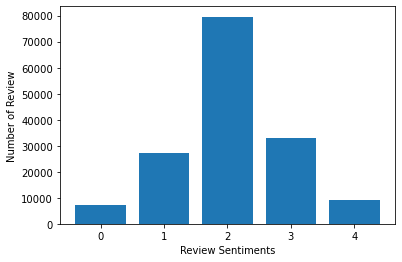

In [36]:
# Histograma de sentimientos

Sentiment_count = data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

### Generación de sentimientos utilizando Bag of Words

Para poder utilizar directamente la información de texto es preciso transformarla en vectores numéricos. Bag of Words es una de las maneras más simples de extraer características de los datos conviertiendo el texto en una matriz de ocurrencia para las palabras. Concierne con el hecho de si una palabra ocurre o no en un documento.

Esta matriz puede representan 1 o n palabras, en ese caso sería un n-grama

In [37]:
from sklearn.feature_extraction.text import CountVectorizer   # Generar matriz de conteo
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer        
from sklearn.model_selection import train_test_split          # Particionar datos en prueba y entrenamiento
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [38]:
# tokenizer remueve elementos no necesarios de los datos como símbolos y números

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

# Particionar dataset

X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [39]:
# Entrenamiento y prueba del modelo usando un clasificador ingenuo de Bayes

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


### TF-IDF 

Bag of words toma a consideranción solamente la frecuencia de las palabras independientemente de la longitu del documento. IDF (Inverse Document Frecuency) por su parte mide la cantidad de información suministrada a lo largo del documento. Es una métrica que escala de manera logarítmica la razón del número de documentos y el número de documentos en los que hace presencia el término $idf(W) = \frac{\#(documents)}{\#(documents containing word W)}$

TF-IDF (Term Frequency-Inverse Document Frequency) normaliza los valores de la matriz de términos

In [40]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Phrase'])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [42]:
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684


## Acceso a datos desde la web y nuestro ordenador

In [54]:
from urllib 

In [73]:
url = "https://www.gutenberg.org/files/2554/2554-0.txt"
raw = urllib.request.urlopen(url).read()
raw = raw.decode('utf-8-sig')
len(raw)
raw[:75]

'The Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r\n'

In [74]:
tokens = word_tokenize(raw)
len(tokens)
tokens[:10]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by']

In [82]:
# Convertir el texto en NLTK 
text = nltk.Text(tokens)
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Project Gutenberg; Ilya
Petrovitch; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


## Manipulación de archivos HTML

In [94]:
from bs4 import BeautifulSoup

In [89]:
url = "https://www.bbc.com/news/av/world-us-canada-58920819"
html = urllib.request.urlopen(url).read()

In [96]:
raw = BeautifulSoup(html).get_text()
raw

"Stranded 600lb turtle returned to Atlantic Ocean - BBC NewsBBC HomepageSkip to contentAccessibility HelpYour accountHomeNewsSportReelWorklifeTravelFutureCultureMenuMoreSearchHomeNewsSportReelWorklifeTravelFutureCultureMusicTVWeatherSoundsClose menuBBC NewsMenuHomeCoronavirusClimateVideoWorldUS & CanadaUKBusinessTechScienceStoriesMoreEntertainment & ArtsHealthIn PicturesReality CheckWorld News TVNewsbeatLong ReadsUS & CanadaStranded 600lb turtle returned to Atlantic OceanStranded 600lb turtle returned to Atlantic OceanCloseVolunteers will track the turtle, which got stuck in a Massachusetts river, to make sure it survives in the ocean.Published2 hours agoSectionBBC NewsSubsectionUS & CanadaSharecloseShare pageCopy linkAbout sharingRelatedStranded 600lb turtle returned to Atlantic Ocean. Video, 00:01:22Stranded 600lb turtle returned to Atlantic OceanPublished2 hours agoSubsectionUS & Canada1:22Up Next. Texas turtles released back into sea. Video, 00:00:54Texas turtles released back into